# Titanic Passenger's Survival Prediction

The dataset contains data for the passangers who had survived and died during titatic disaster on April 15, 1912 when titanic ship collide with a iceburg.

# Titanic Dataset

- 891 datapoints
- 12 Features including class label

# Feature Information:

1. survival - Survived or not
2. PassengerId - Unique id of a passenger. 
3. pclass - Ticket class
4. Name - Passenger's Name
5. sex - Sex     
6. Age - Age in years     
7. sibsp - No of siblings / spouses aboard the Titanic     
8. parch - No of parents / children aboard the Titanic     
9. ticket - Ticket number     
10. fare - Passenger's fare     
11. cabin - Cabin number     
12. embarked - Port of Embarkation

# Objective:

To predict whether a passenger survived or died after titanic ship collide with iceburg based on the features specified in the dataset.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv('titanic_dataset.csv')

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

# Data Analysis

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


# Missing Data

In [13]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

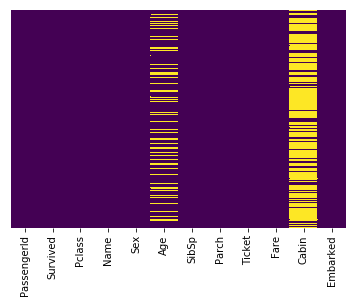

In [14]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

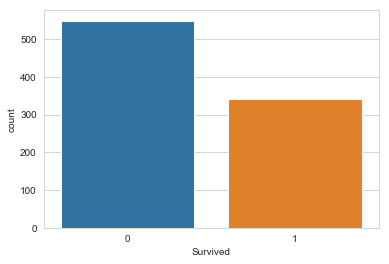

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data)

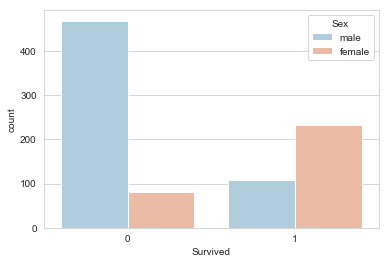

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')

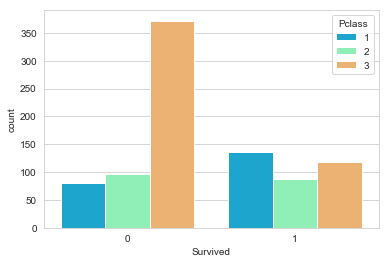

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data,palette='rainbow')

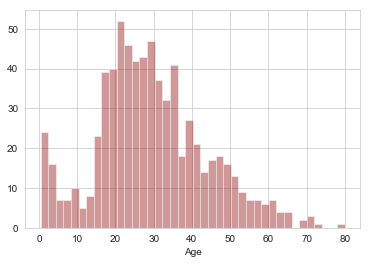

In [11]:
sns.distplot(data['Age'].dropna(),kde=False,color='darkred',bins=40)

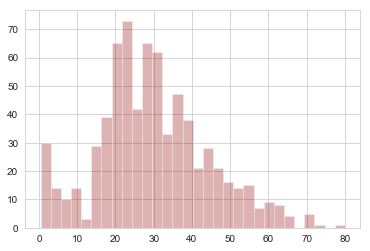

In [12]:
data['Age'].hist(bins=30,color='darkred',alpha=0.3)

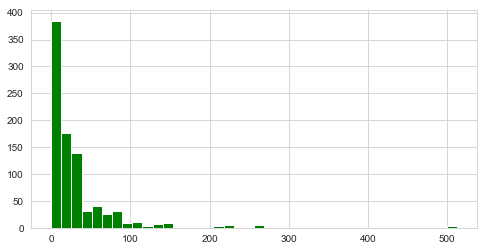

In [13]:
data['Fare'].hist(color='green',bins=40,figsize=(8,4))

# Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

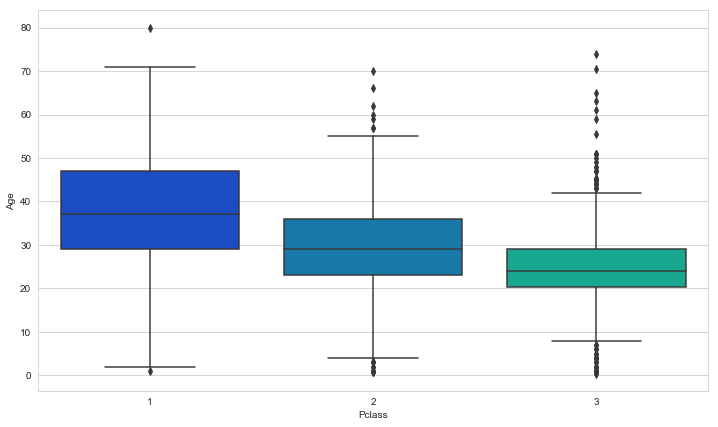

In [47]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')


We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [16]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

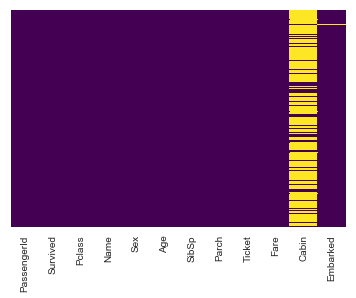

In [19]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
data.drop('Cabin',axis=1,inplace=True)

In [18]:
data.dropna(inplace=True)

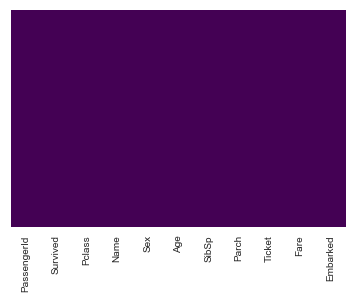

In [54]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [19]:
pd.get_dummies(data['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [20]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)

In [21]:
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [22]:
data = pd.concat([data,sex,embark],axis=1)

In [27]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Model Building

In [23]:
data.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), 
                                                    data['Survived'], test_size=0.30, 
                                                    random_state=101)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
predictions = logmodel.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
accuracy=confusion_matrix(y_test,predictions)

In [36]:
accuracy

array([[151,  12],
       [ 36,  68]], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8202247191011236

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.81      0.93      0.86       163
          1       0.85      0.65      0.74       104

avg / total       0.82      0.82      0.81       267



In [26]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [73]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7415730337078652

In [75]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8127340823970037

In [64]:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

79.42

In [85]:
model=RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42)
model.fit(X_train,y_train)
print("The accuracy of model is: ",model.score(X_test,y_test)*100)


The accuracy of model is:  84.6441947565543


In [80]:
y_predicted= model.predict(X_test)

cm = confusion_matrix(y_test,y_predicted)
cm

array([[148,  15],
       [ 26,  78]], dtype=int64)

In [81]:
accuracy=accuracy_score(y_test,y_predicted)
accuracy

0.846441947565543

# Conclusion:

As we can see, we get decent accuracy with all our models, but the best one is RandomForestClassifier.
We can still improve its accuracy by tuning some hyperparamets.